### Import required libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

### Set hyperparameters

In [2]:
batch_size = 16
learning_rate = 0.0002
num_epoch = 5

#### 1) Download Data

In [3]:
mnist_train = dset.MNIST('./', train=True, transform=transforms.ToTensor(),
                         target_transform=None, download=True)
mnist_test = dset.MNIST('./', train=False, transform=transforms.ToTensor(),
                        target_transform=None, download=True)

#### Set DataLoader

In [4]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,
                                           shuffle=True, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,
                                          shuffle=False, num_workers=2, drop_last=True)

### Model & Optimizer

#### Model

In [5]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(28*28, 20)
        self.decoder = nn.Linear(20, 28*28)
        
    def forward(self, x):
        x = x.view(batch_size, -1)
        encoded = self.encoder(x)
        out = self.decoder(encoded).view(batch_size, 1, 28, 28)
        
        return out
    
# model = Autoencoder().cuda()
model = Autoencoder()

#### Loss func & Optimizer

In [6]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Train

In [7]:
loss_arr = []

for i in range(num_epoch):
    for j, [image, label] in tqdm_notebook(enumerate(train_loader)):
        # x = Variable(image).cuda()
        x = Variable(image)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output, x)
        loss.backward()
        optimizer.step()
        
        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.item())

/home/p829911/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


tensor(0.1363, grad_fn=<MseLossBackward>)
tensor(0.0547, grad_fn=<MseLossBackward>)
tensor(0.0400, grad_fn=<MseLossBackward>)
tensor(0.0412, grad_fn=<MseLossBackward>)



tensor(0.0382, grad_fn=<MseLossBackward>)
tensor(0.0312, grad_fn=<MseLossBackward>)
tensor(0.0286, grad_fn=<MseLossBackward>)
tensor(0.0320, grad_fn=<MseLossBackward>)



tensor(0.0282, grad_fn=<MseLossBackward>)
tensor(0.0243, grad_fn=<MseLossBackward>)
tensor(0.0288, grad_fn=<MseLossBackward>)
tensor(0.0293, grad_fn=<MseLossBackward>)



tensor(0.0261, grad_fn=<MseLossBackward>)
tensor(0.0218, grad_fn=<MseLossBackward>)
tensor(0.0267, grad_fn=<MseLossBackward>)
tensor(0.0278, grad_fn=<MseLossBackward>)



tensor(0.0267, grad_fn=<MseLossBackward>)
tensor(0.0258, grad_fn=<MseLossBackward>)
tensor(0.0256, grad_fn=<MseLossBackward>)
tensor(0.0226, grad_fn=<MseLossBackward>)



### Check with Train Image

torch.Size([16, 28, 28])


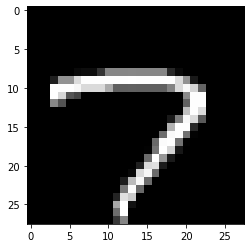

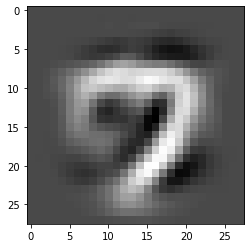

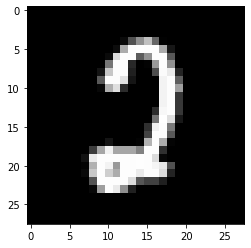

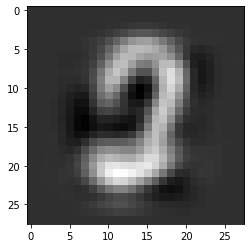

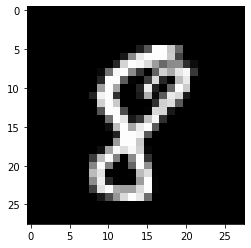

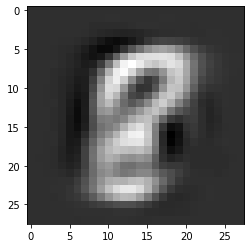

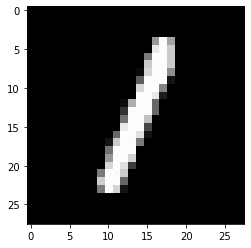

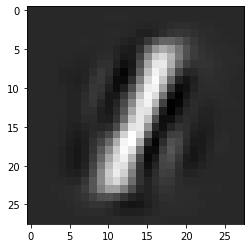

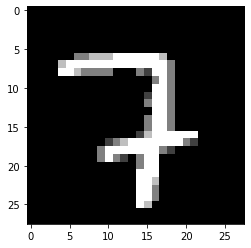

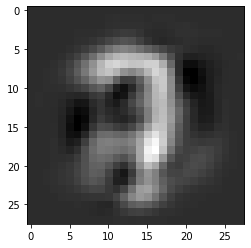

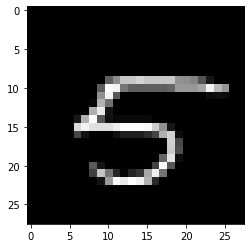

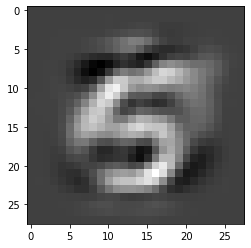

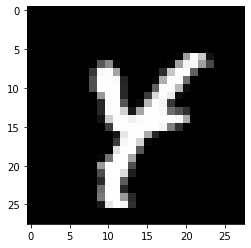

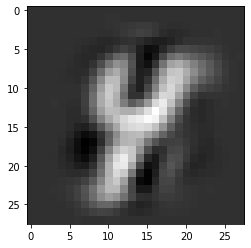

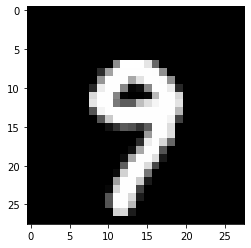

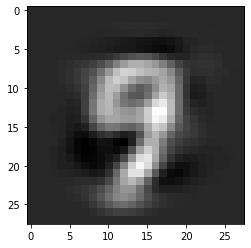

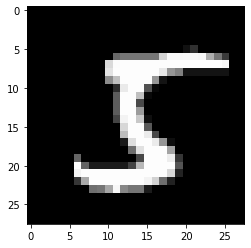

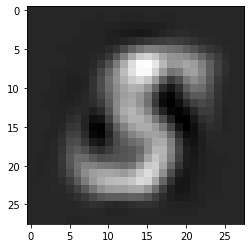

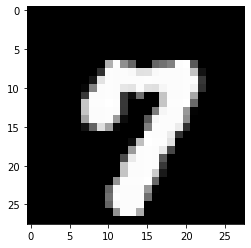

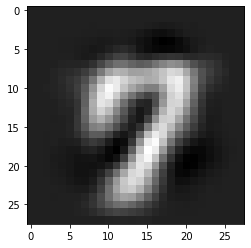

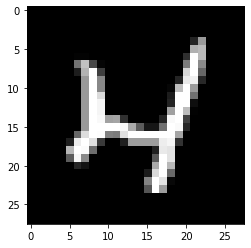

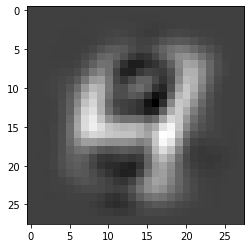

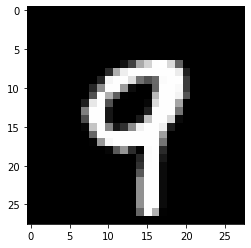

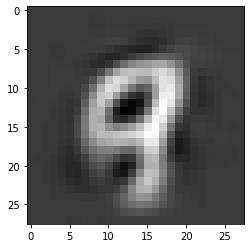

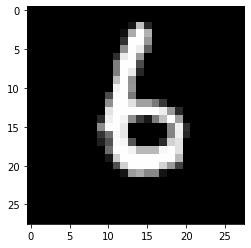

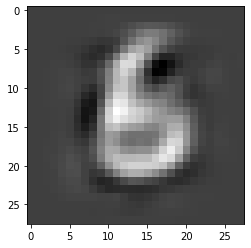

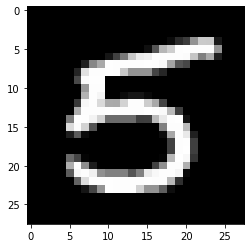

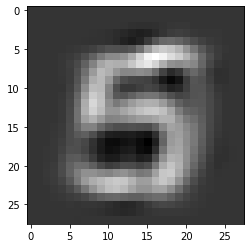

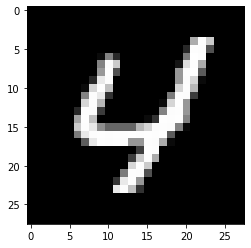

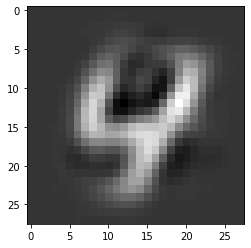

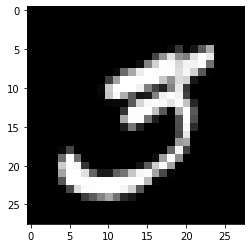

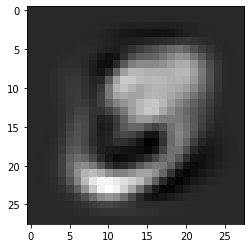

In [8]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(out_img.size()[0]):
    plt.imshow(torch.squeeze(image[i]).numpy(), cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(), cmap='gray')
    plt.show()